# Big Data Mart Sales Problem


#### Problem Statement:
    The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

    Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

    The dataset includes two files:

        - bigdatamart_Train.csv: Use this file for the model building purpose. 

        - bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

In [3]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score



# data analysis and wrangling
import pandas as pds
import numpy as npy
import random as rndm

# visualization
import seaborn as snsb
import matplotlib.pyplot as pyplt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier





import warnings
warnings.filterwarnings('ignore')

Importing  the desired dataset from the system.

In [4]:
df_train=pds.read_csv('C:/Users/lenovo/Datatrained Machined Learning Projects/Big Data Mart Sales Predictions/bigdatamart_Train.csv')
df_test=pds.read_csv('C:/Users/lenovo/Datatrained Machined Learning Projects/Big Data Mart Sales Predictions/bigdatamart_Test.csv')

# EDA

In [5]:
df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [6]:
df_test.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [7]:
df_train.shape

(8523, 12)

df_train datset or dataframe  has 12 columns and 8523 rows

In [8]:
df_test.shape

(5681, 11)

df_test dataset or dataframe has 11 rows and 5681 columns

---->We wil comnine the df_train  and _df_test dataframe into one dataframe i.e. df_combinedata by ignoring the index 

In [9]:
#We will combine train and test data for better Analysis
# adding the Source column in both the dataset and Item_Outlet_Source to 0.00 
df_train['Source']='df_train'
df_test['Source']='df_test'
df_test['Item_Outlet_Sales']=0.0

#Concatenating the data in df variable
df_combinedata=pds.concat([df_train,df_test],sort=False,ignore_index=True)
df_combinedata

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,df_train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,df_train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,df_train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,df_train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,df_train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,df_test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,df_test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0000,df_test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0000,df_test


So we get a new dataset of 14204 rows and 13 columns 

In [10]:
df_combinedata.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Source                          0
dtype: int64

Item_weight column consist total 2439 NaN values and outlet_size column consist total 4016 NaN values

 Checking of data types in our Datset has 8 rows with object type data out of which we have created one and one is an identifier column. others we will have to encode them

In [11]:
df_combinedata.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Source                        object
dtype: object

There is skewness present in the item visibility which need to be handled

In [12]:
df_combinedata.skew()

Item_Weight                  0.101309
Item_Visibility              1.195175
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.544684
dtype: float64

Identifying of categorical and non-categorical(i.e. continous) data , Item_Identifier, Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales are continuos type of data rest are categorical.

In [13]:
df_combinedata.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
Source                           2
dtype: int64

In [14]:
df_combinedata.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Univariate Analysis

In [15]:
#Lets separate categorical features first
catgor=[feature for feature in df_combinedata.columns if df_combinedata[feature].nunique()<20 and feature!='Source']
catgor

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

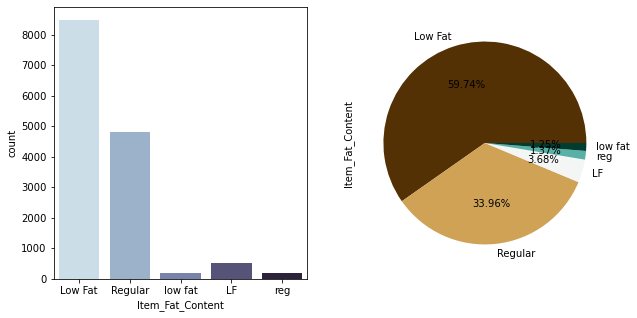

In [16]:
pyplt.figure(figsize=(10,5))
pyplt.subplot(1,2,2)
df_combinedata['Item_Fat_Content'].value_counts().plot.pie(autopct='%1.2f%%',cmap = 'BrBG')
pyplt.subplot(1,2,1)
snsb.countplot(df_combinedata['Item_Fat_Content'], palette="ch:s=.25,rot=-.25")
df_combinedata['Item_Fat_Content'].value_counts(ascending = False)

Low Fat products are more than Regular products.Different low fat categories need to be merged. Same must be done with regular categories.

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

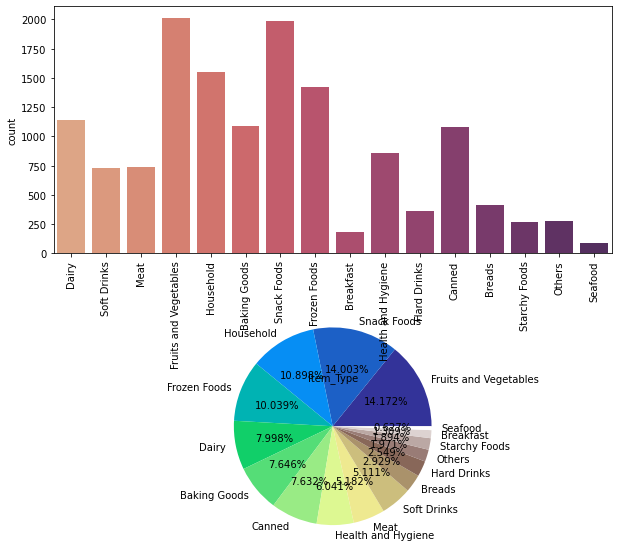

In [17]:
pyplt.figure(figsize=(10,10))
pyplt.subplot(2,1,2)
df_combinedata['Item_Type'].value_counts().plot.pie(autopct='%1.3f%%',cmap = 'terrain',textprops={'fontsize':10})
pyplt.ylabel('')
pyplt.subplot(2,1,1)
snsb.countplot(df_combinedata['Item_Type'], palette = 'flare')
pyplt.xticks(rotation = 90)
df_combinedata['Item_Type'].value_counts()

Fruits and Vegetables,Snack Foodsand Frozen Foods are the two categories in which most of the items fall whereas Seafood and Breakfast is the least items.

OUT019     880
OUT010     925
OUT017    1543
OUT018    1546
OUT045    1548
OUT046    1550
OUT035    1550
OUT049    1550
OUT013    1553
OUT027    1559
Name: Outlet_Identifier, dtype: int64

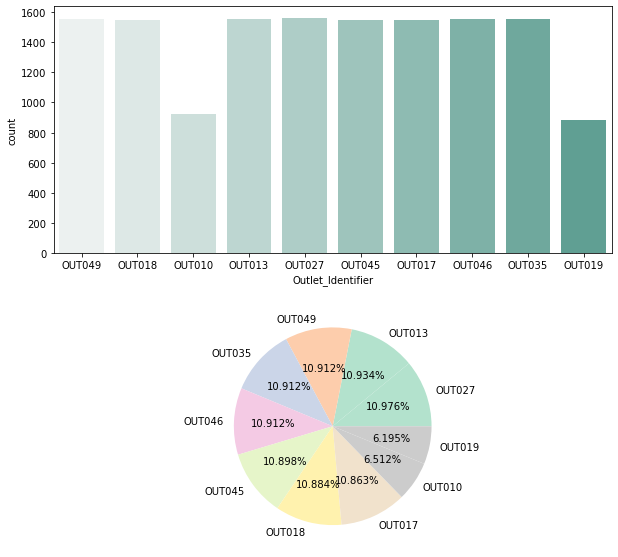

In [18]:
pyplt.figure(figsize=(10,10))
pyplt.subplot(2,1,2)
df_combinedata['Outlet_Identifier'].value_counts().plot.pie(autopct='%1.3f%%', cmap = 'Pastel2')
pyplt.ylabel('')
pyplt.subplot(2,1,1)
snsb.countplot(df_combinedata['Outlet_Identifier'], palette = 'light:#5A9')
df_combinedata['Outlet_Identifier'].value_counts(ascending  = True)

There are  total = 10 outlets which are almost balanced.

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

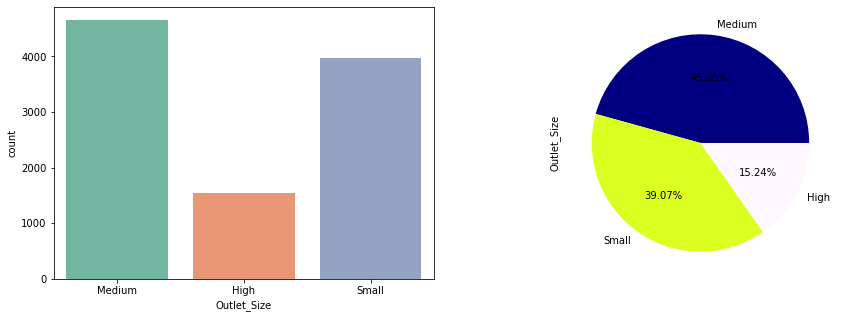

In [19]:
pyplt.figure(figsize=(15,5))
pyplt.subplot(1,2,2)
df_combinedata['Outlet_Size'].value_counts().plot.pie(autopct='%1.2f%%',cmap = 'gist_ncar')
pyplt.subplot(1,2,1)
snsb.countplot(df_combinedata['Outlet_Size'], palette ='Set2')
df_combinedata['Outlet_Size'].value_counts()

Most of the outlets are of medium size.

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

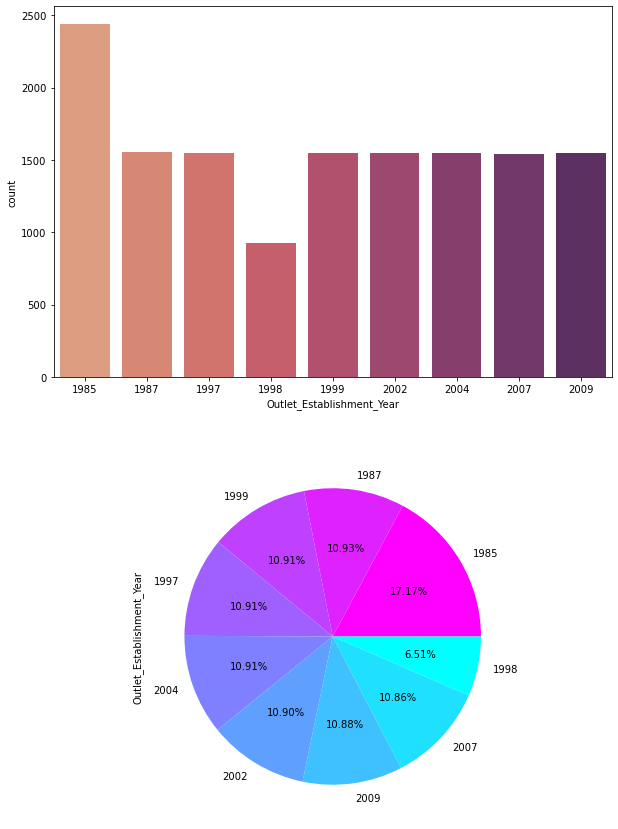

In [20]:
pyplt.figure(figsize=(10,15))
pyplt.subplot(2,1,2)
df_combinedata['Outlet_Establishment_Year'].value_counts().plot.pie(autopct='%1.2f%%',cmap = 'cool_r')
pyplt.subplot(2,1,1)
snsb.countplot(df_combinedata['Outlet_Establishment_Year'], palette = 'flare')
df_combinedata['Outlet_Establishment_Year'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

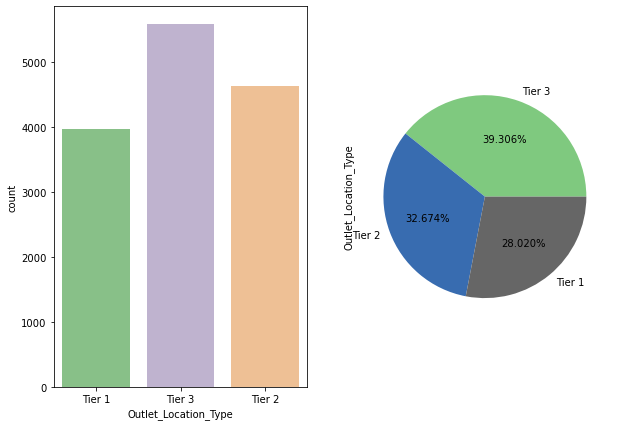

In [21]:
pyplt.figure(figsize=(10,7))
pyplt.subplot(1,2,2)
df_combinedata['Outlet_Location_Type'].value_counts().plot.pie(autopct='%1.3f%%', cmap = 'Accent')
pyplt.subplot(1,2,1)
snsb.countplot(df_combinedata['Outlet_Location_Type'], palette= 'Accent')
df_combinedata['Outlet_Location_Type'].value_counts()

Large number of  stores are located in tier 3 cities.

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

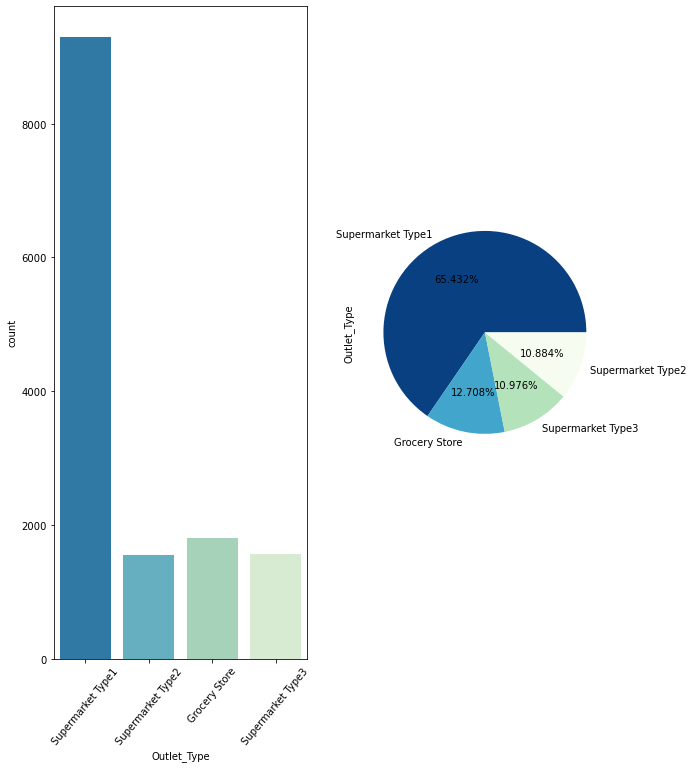

In [22]:
pyplt.figure(figsize=(10,12))
pyplt.subplot(1,2,2)
df_combinedata['Outlet_Type'].value_counts().plot.pie(autopct='%1.3f%%', cmap = 'GnBu_r')
pyplt.subplot(1,2,1)
snsb.countplot(df_combinedata['Outlet_Type'], palette = 'GnBu_r')
pyplt.xticks(rotation=50)
df_combinedata['Outlet_Type'].value_counts()

11% are of  Type 2 , 11 % are of Type 3 ,13% are of Grocery Store and  65% are of Supermarket type 1

In [23]:
#Separating the continuous feature
continuousfeature=[feature for feature in df_combinedata.columns if df_combinedata[feature].nunique()>20 and feature!='Item_Identifier' and feature!='Item_Outlet_Sales']
continuousfeature

['Item_Weight', 'Item_Visibility', 'Item_MRP']

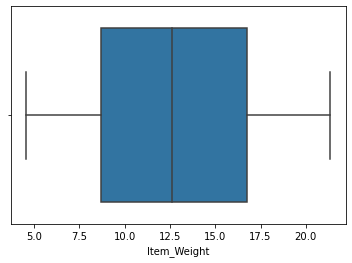

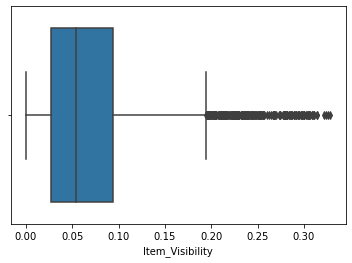

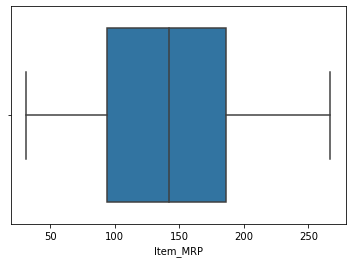

<Figure size 432x288 with 0 Axes>

In [24]:
for feat in continuousfeature:
    snsb.boxplot(df_combinedata[feat])
    pyplt.figure()

Only Item Visibility has large no. of outliers

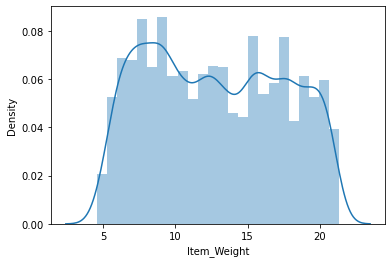

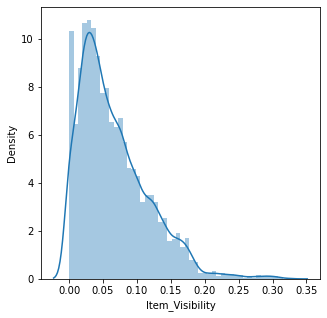

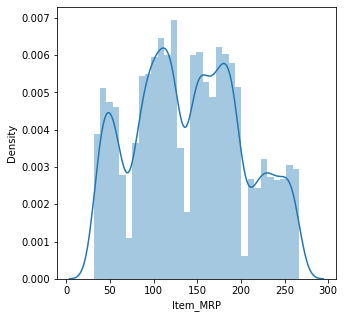

<Figure size 360x360 with 0 Axes>

In [25]:
for feat in continuousfeature:
    snsb.distplot(df_combinedata[feat])
    pyplt.figure(figsize = (5,5))

 Item_Visibility is skewed to the right.

### Bivariate Analysis

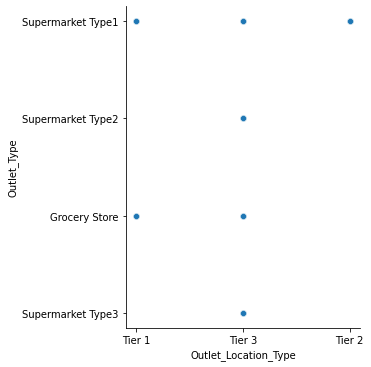

In [26]:
cmap = snsb.cubehelix_palette(rot=-.2, as_cmap=True)
snsb.relplot(df_combinedata['Outlet_Location_Type'],df_combinedata['Outlet_Type'], palette =  cmap)

Tier 3 cities have only Superkarket type 1 whereas Tier 1 cities have only supermarket 1 and grocery strores

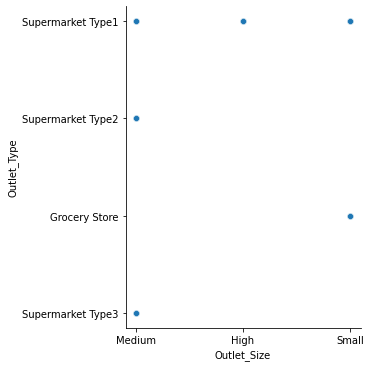

In [27]:
snsb.relplot(df_combinedata['Outlet_Size'],df_combinedata['Outlet_Type'], palette = 'muted')

The above relationplot shows that Supermarket type 1 are of all sizes whereas grocery stores are only small and Supermarket type 2.

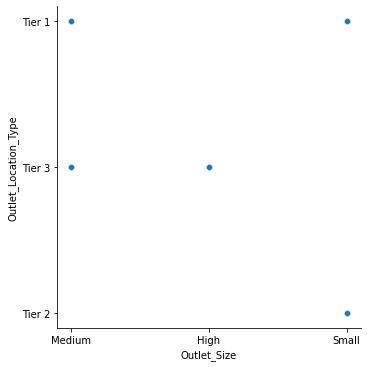

In [28]:
snsb.relplot(df_combinedata['Outlet_Size'],df_combinedata['Outlet_Location_Type'],palette = 'muted')

The above relplot shows that high Outlet_Size is only found in tier 3 cities as well as Tier 2 citis have only small Outlet_Size. 

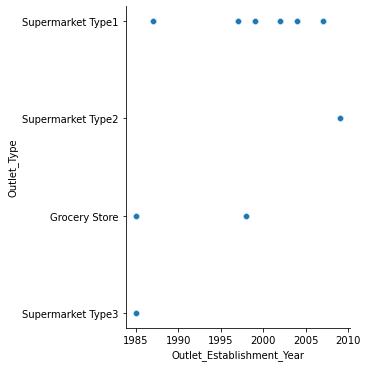

In [29]:
snsb.relplot(df_combinedata['Outlet_Establishment_Year'],df_combinedata['Outlet_Type'])

Grocery stores and supermarket are the oldest outlet type of them all which is represented in relplot .

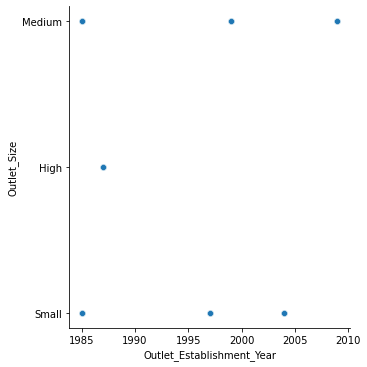

In [30]:
snsb.relplot(df_combinedata['Outlet_Establishment_Year'],df_combinedata['Outlet_Size'])

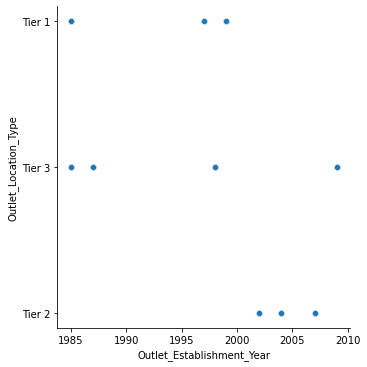

In [31]:
snsb.relplot(df_combinedata['Outlet_Establishment_Year'],df_combinedata['Outlet_Location_Type'],palette='muted')

According to the relplot Tier1 and tier2 cities outlet_Establishment_Year were established in 1985 whereas tier2 got outlets after 2000. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT013'),
  Text(4, 0, 'OUT027'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT046'),
  Text(8, 0, 'OUT035'),
  Text(9, 0, 'OUT019')])

<Figure size 720x720 with 0 Axes>

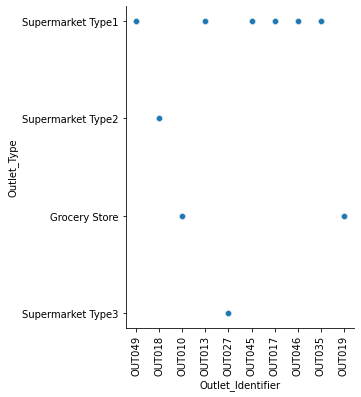

In [32]:
pyplt.figure(figsize=(10,10))
snsb.relplot(df_combinedata['Outlet_Identifier'],df_combinedata['Outlet_Type'])
pyplt.xticks(rotation=90)

There is only one oulat identifier for supermarket 2 and 3 while most of the outlet identifiers belong to supermarket1

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT013'),
  Text(4, 0, 'OUT027'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT046'),
  Text(8, 0, 'OUT035'),
  Text(9, 0, 'OUT019')])

<Figure size 1440x432 with 0 Axes>

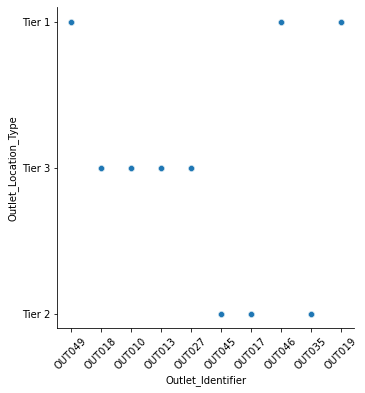

In [33]:
pyplt.figure(figsize=(20,6))
snsb.relplot(df_combinedata['Outlet_Identifier'],df_combinedata['Outlet_Location_Type'])
pyplt.xticks(rotation=45)

Tier 3 has the most diff types of outlets, but they are almost balanced.

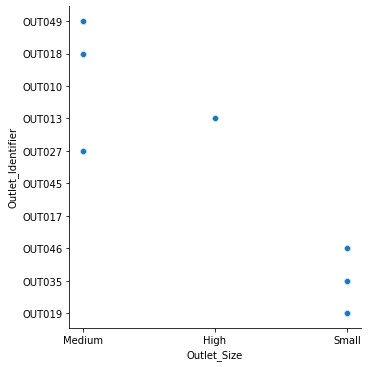

In [34]:
snsb.relplot(df_combinedata['Outlet_Size'],df_combinedata['Outlet_Identifier'])

Only Outlet13 with high outlet size.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT013'),
  Text(4, 0, 'OUT027'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT046'),
  Text(8, 0, 'OUT035'),
  Text(9, 0, 'OUT019')])

<Figure size 1440x432 with 0 Axes>

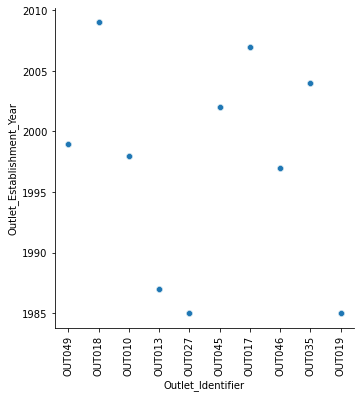

In [35]:
pyplt.figure(figsize=(20,6))
snsb.relplot(df_combinedata['Outlet_Identifier'],df_combinedata['Outlet_Establishment_Year'])
pyplt.xticks(rotation=90)

According to the figure,Outlet 27 and 19 are the oldest outlet identifier and outlet 18  is the newest.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT013'),
  Text(4, 0, 'OUT027'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT046'),
  Text(8, 0, 'OUT035'),
  Text(9, 0, 'OUT019')])

<Figure size 1440x1152 with 0 Axes>

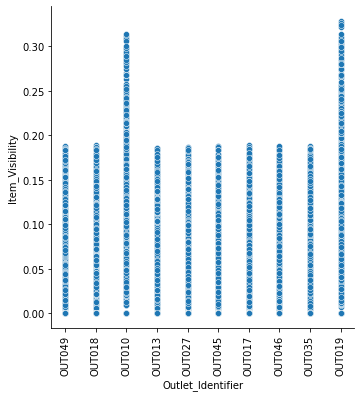

In [36]:
pyplt.figure(figsize=(20,16))
snsb.relplot(df_combinedata['Outlet_Identifier'],df_combinedata['Item_Visibility'])

pyplt.xticks(rotation=90)

Only Outlet 10 and 19 gives the highest visibilty.

([0, 1, 2, 3],
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

<Figure size 1440x1152 with 0 Axes>

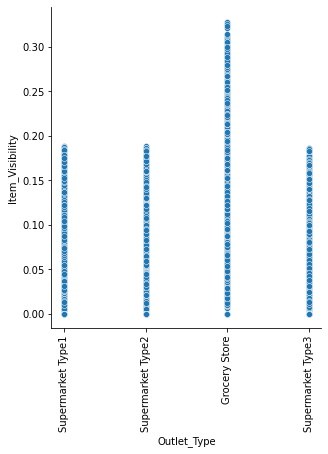

In [37]:
pyplt.figure(figsize=(20,16))
snsb.relplot(df_combinedata['Outlet_Type'],df_combinedata['Item_Visibility'])
pyplt.xticks(rotation=90)

Grocery stores shows more output rather than any other super markets types.

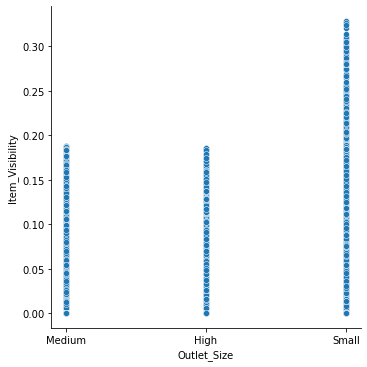

In [38]:
snsb.relplot(df_combinedata['Outlet_Size'],df_combinedata['Item_Visibility'])

Smallest Stores gives the more visibility to products

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Low Fat'),
  Text(1, 0, 'Regular'),
  Text(2, 0, 'low fat'),
  Text(3, 0, 'LF'),
  Text(4, 0, 'reg')])

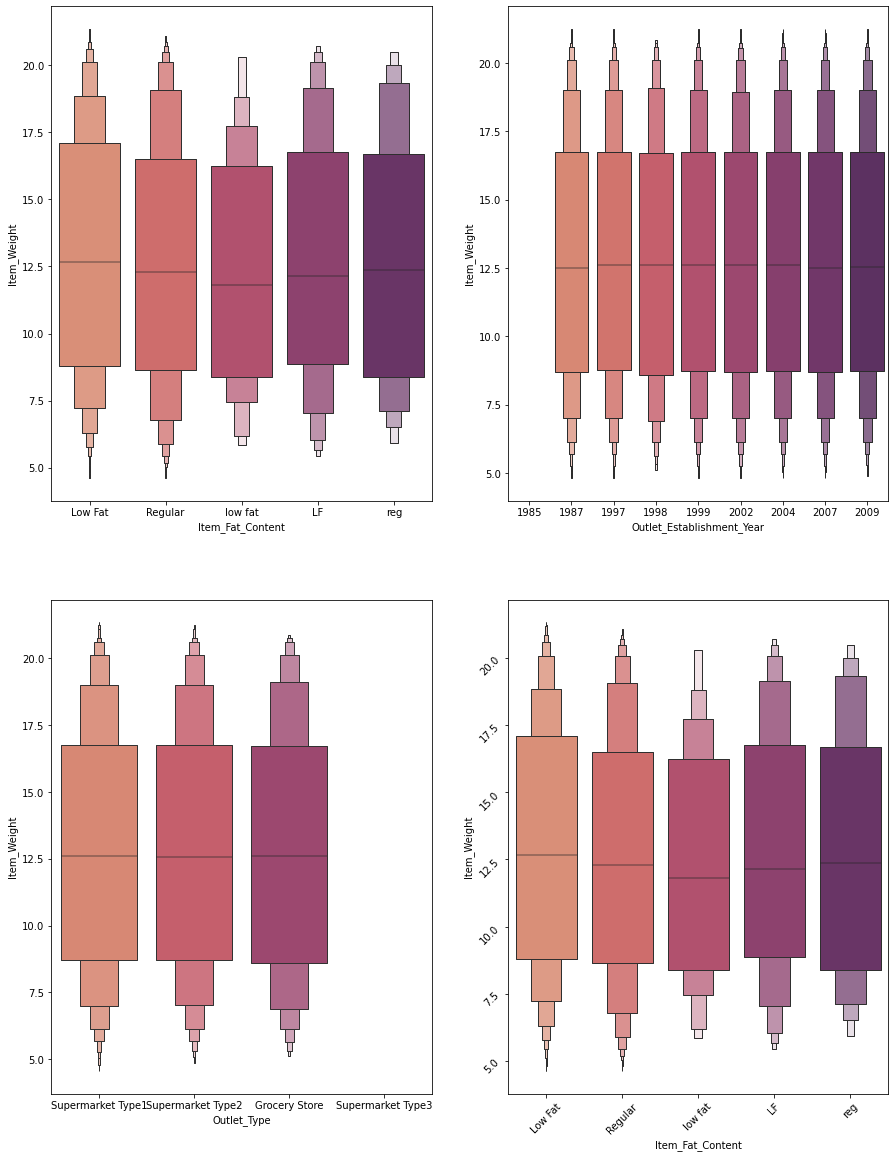

In [39]:
fig,ax=pyplt.subplots(2,2,figsize=(15,20))
pyplt.yticks(rotation=45)
l=0
p=0
for b,n in enumerate(['Item_Fat_Content','Outlet_Establishment_Year','Outlet_Type','Item_Fat_Content']):
    if b%2==0 and b>0:
        l+=1
        p=0
    snsb.boxenplot(x=df_combinedata[n],y=df_combinedata['Item_Weight'],ax=ax[l,p],showfliers = False,palette='flare')
    p+=1
    
pyplt.xticks(rotation=45)

Weight of Data is missing for Supermarket 3 and for year 1985, Median of low fat content is lowest.

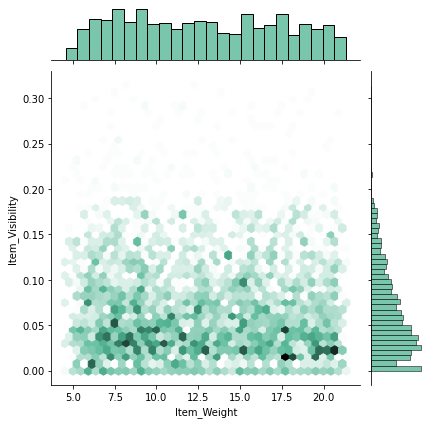

<Figure size 432x288 with 0 Axes>

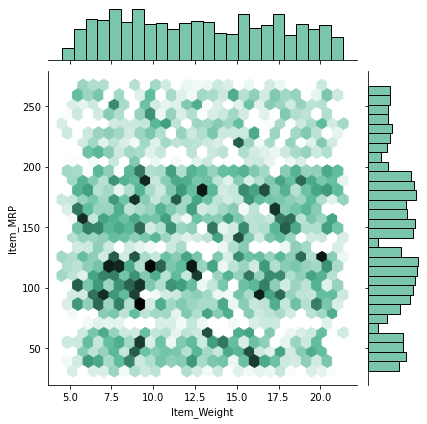

<Figure size 432x288 with 0 Axes>

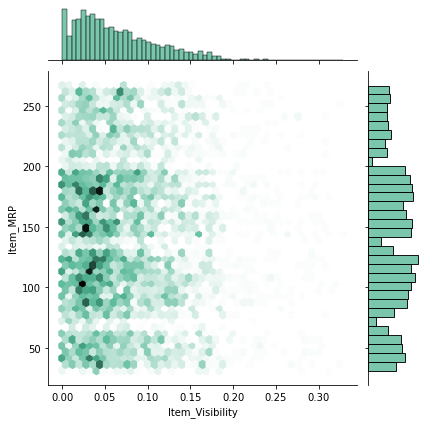

<Figure size 432x288 with 0 Axes>

In [40]:
for r in range(len(continuousfeature)):
    for s in range(r+1,len(continuousfeature)):
        snsb.jointplot(x=continuousfeature[r],y=continuousfeature[s],data=df_combinedata,kind="hex", color="#4CB391")
        pyplt.figure()

Lesser products with high visibility. Seems to exist no correlation between the above continuous features

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

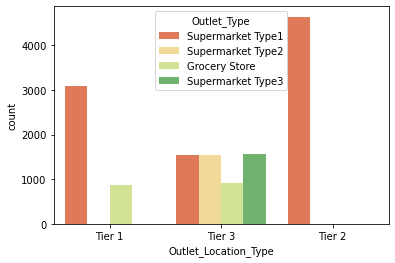

In [41]:
snsb.countplot(df_combinedata['Outlet_Location_Type'],hue=df_combinedata['Outlet_Type'], palette='RdYlGn')

Tier 3  cities have all types of Outlets.Tier 2 cities have the highest number of supermarket 2. 

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

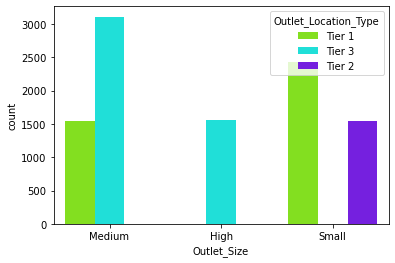

In [42]:
snsb.countplot(df_combinedata['Outlet_Size'],hue=df_combinedata['Outlet_Location_Type'], palette = 'hsv')

Tier 3 cities have the highest no. of medioum size outlet and tier 1 cities have highest no. small size outlets.Tier 3 cities have the least no. of stores

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

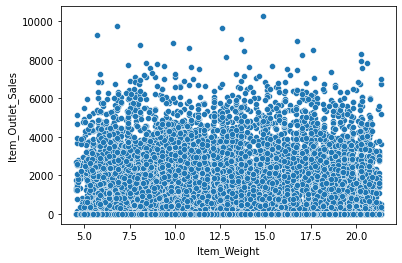

In [43]:
snsb.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=df_combinedata,palette = dict(Yes="m", No="g"))

No relation between Item_Weight and Item_Outlet_Sales.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

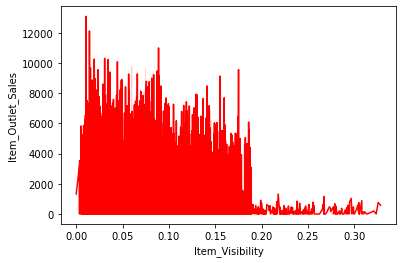

In [44]:
snsb.relplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df_combinedata, color= 'red')

Ttem outlet sales sharply decreases for the most visible items

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

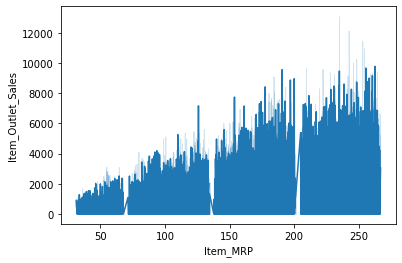

In [45]:
snsb.relplot(x='Item_MRP',y='Item_Outlet_Sales',data=df_combinedata, palette = 'RdGy')

As the mrp of an item increases item outlet sales also increases

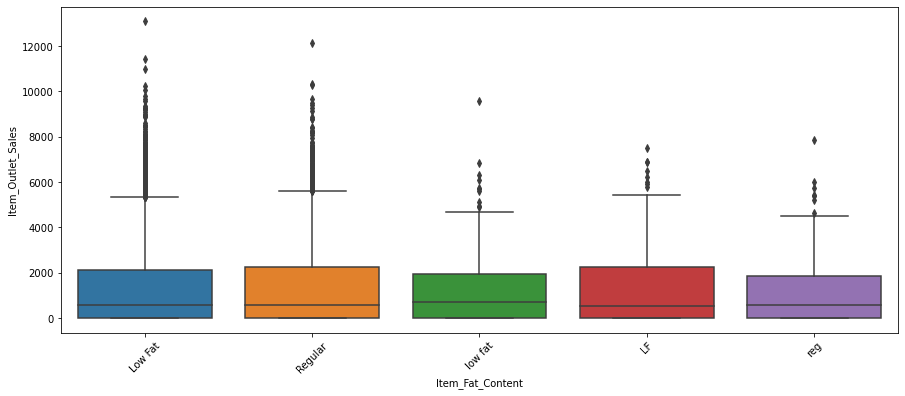

<Figure size 432x288 with 0 Axes>

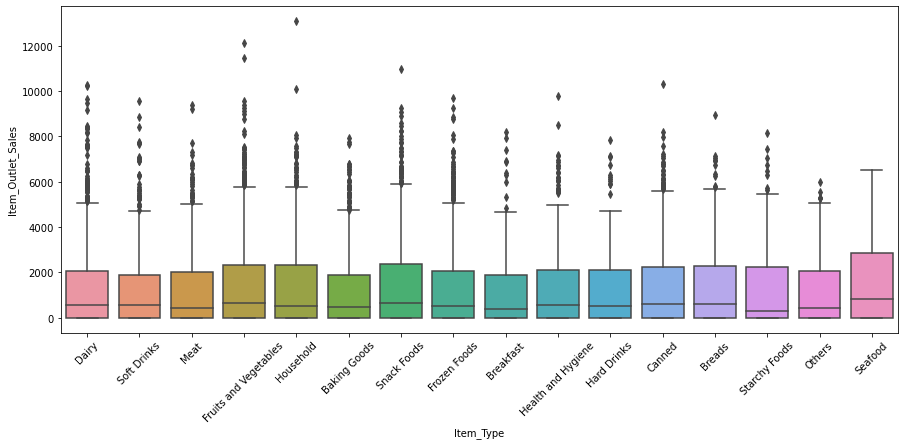

<Figure size 432x288 with 0 Axes>

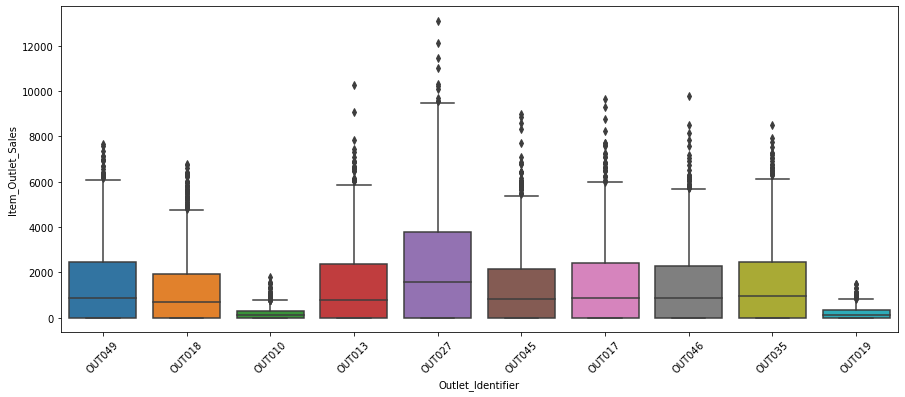

<Figure size 432x288 with 0 Axes>

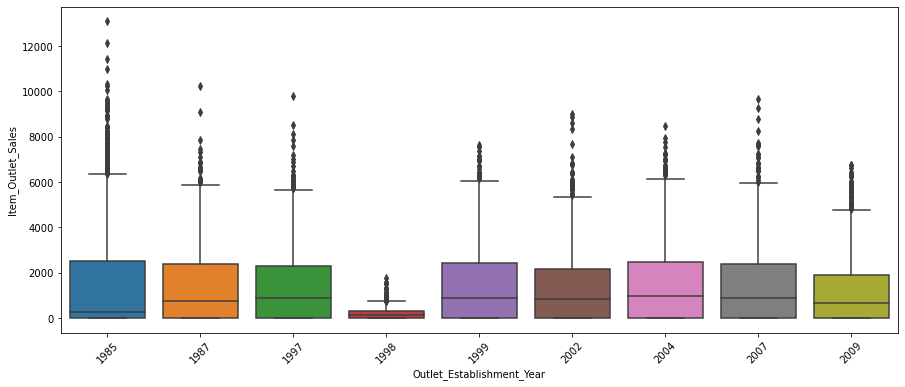

<Figure size 432x288 with 0 Axes>

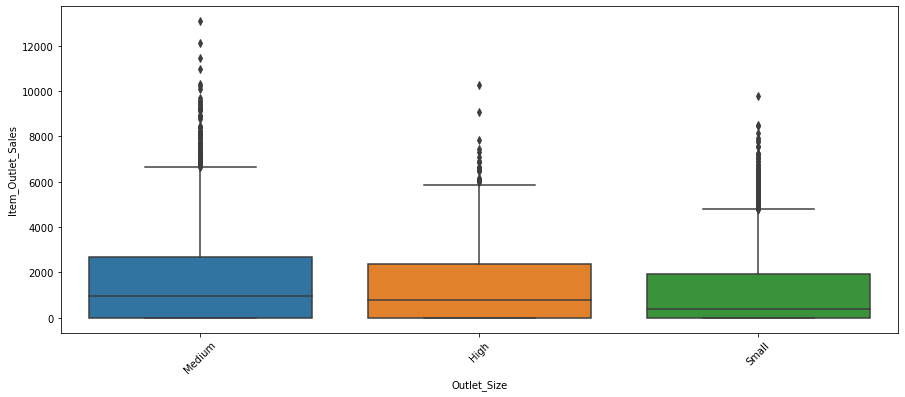

<Figure size 432x288 with 0 Axes>

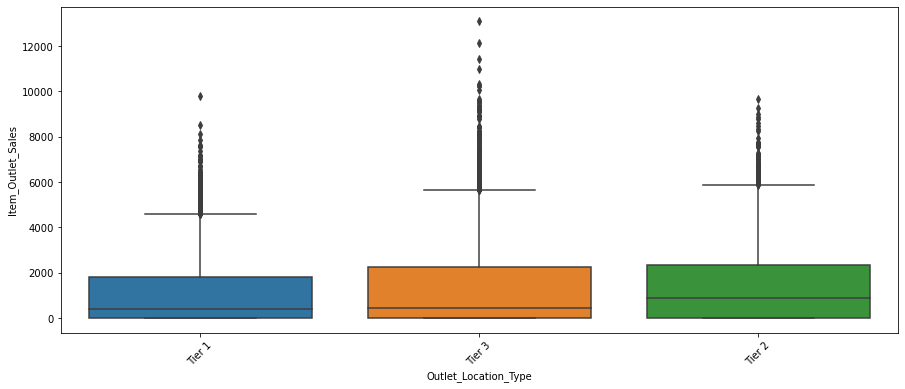

<Figure size 432x288 with 0 Axes>

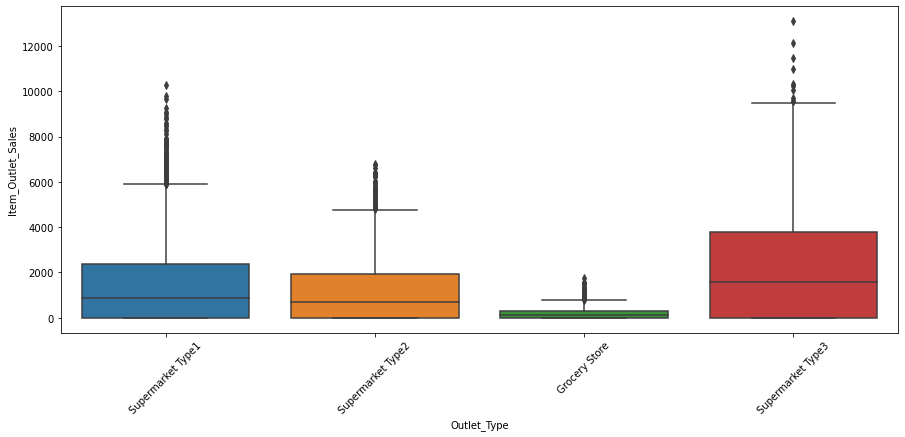

<Figure size 432x288 with 0 Axes>

In [46]:
for i in catgor:
    pyplt.figure(figsize=(15,6))
    snsb.boxplot(x=df_combinedata[i],y=df_combinedata['Item_Outlet_Sales'])
    pyplt.xticks(rotation=45)
    pyplt.figure()

Seafood, Vegetables and Fruits contribute towards the Item_Outlet_Sales. Medium size outlets and Supermarket 3 gives the most item outlet sales.

### Multivariate Analysis

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

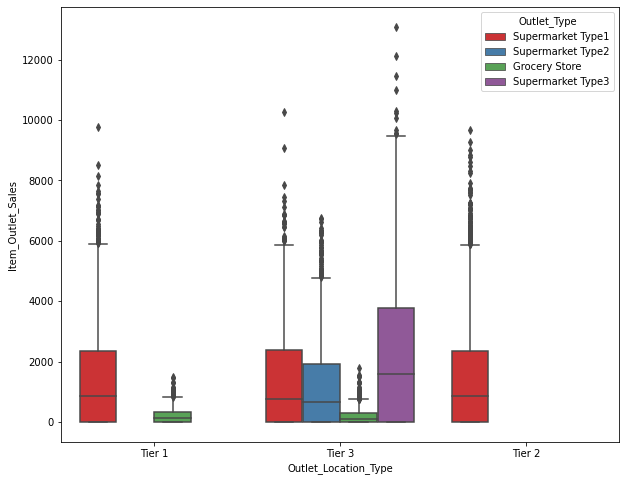

In [47]:
pyplt.figure(figsize=(10,8))
snsb.boxplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=df_combinedata, palette = 'Set1')

Locations consisting Tier 3 have the most sales.

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

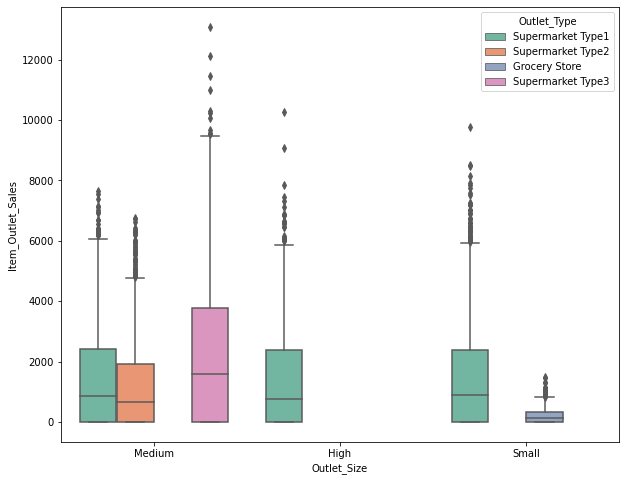

In [48]:
pyplt.figure(figsize=(10,8))
snsb.boxplot('Outlet_Size','Item_Outlet_Sales',hue='Outlet_Type',data=df_combinedata, palette = 'Set2')

According to boxplot graph it can be seen that medium size outlets sell more item and also they have the huge type of outlets therefore the sales increases even more

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_MRP'>

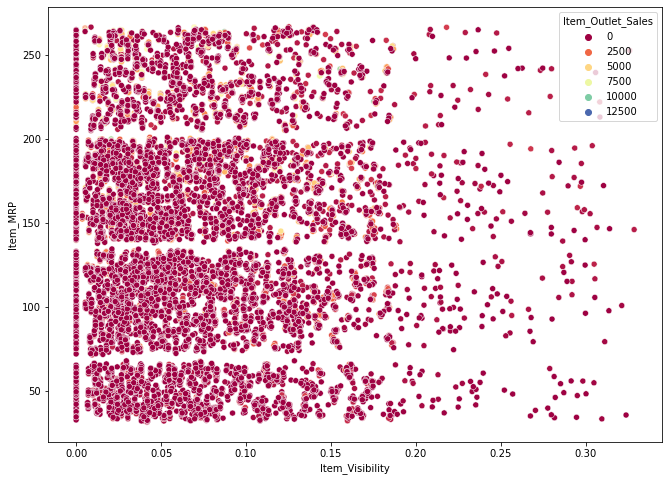

In [49]:
pyplt.figure(figsize=(11,8))
snsb.scatterplot('Item_Visibility','Item_MRP',hue='Item_Outlet_Sales',data=df_combinedata,palette='Spectral')

Item_Outlet_Sales increases with high item price and low item visibility.

<AxesSubplot:>

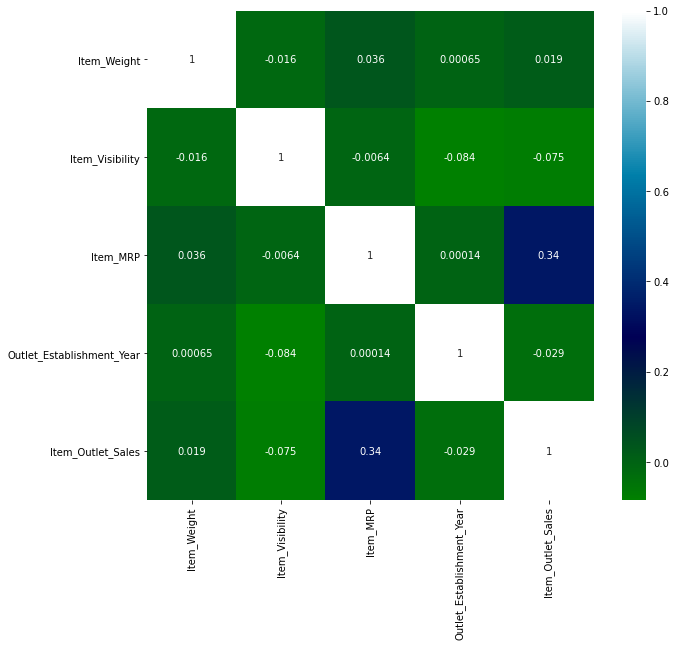

In [50]:
pyplt.figure(figsize=(10,9))
snsb.heatmap(df_combinedata.corr(),annot=True, cmap = 'ocean')

MRP has the strongest positive correlation with Item_Outlet_Sales, while visibility and establishment show a little negative correlation.

# Feature Engineering

##### Handling Missing  Values 

###### Item_Visibility

In [51]:
df_combinedata['Item_Visibility'].value_counts()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
           ... 
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [52]:
#Replacing 0 visibility with nan values
df_combinedata['Item_Visibility'].replace(0,npy.nan,inplace=True)
df_combinedata['Item_Visibility'].min()

0.003574698

(array([0, 1, 2]),
 [Text(0, 0, 'Medium'), Text(1, 0, 'High'), Text(2, 0, 'Small')])

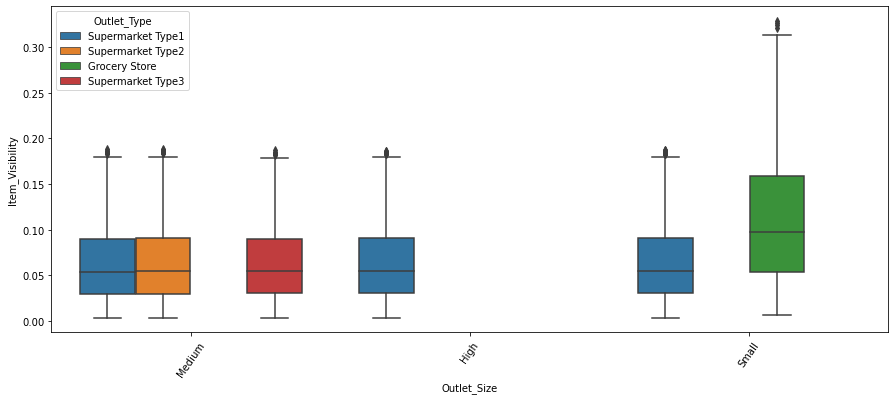

In [53]:
#Checking visibility in Outlet size with Outlet type
pyplt.figure(figsize=(15,6))
snsb.boxplot(data=df_combinedata, x='Outlet_Size', y='Item_Visibility', hue='Outlet_Type')
pyplt.xticks(rotation=55)

Item_visibility contains missing values(NaN)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT013'),
  Text(4, 0, 'OUT027'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT046'),
  Text(8, 0, 'OUT035'),
  Text(9, 0, 'OUT019')])

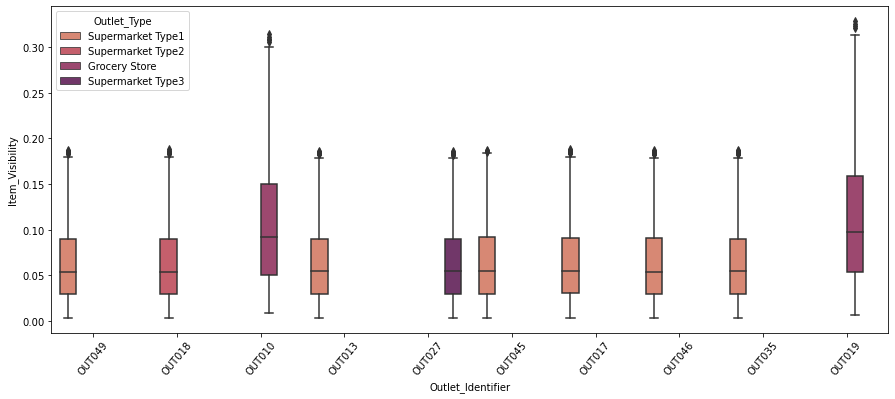

In [54]:
#Checking visibility in Outlet identifier with Outlet type
pyplt.figure(figsize=(15,6))
snsb.boxplot(data=df_combinedata, x='Outlet_Identifier', y='Item_Visibility', hue='Outlet_Type', palette = 'flare')
pyplt.xticks(rotation=50)

Contain missing values 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

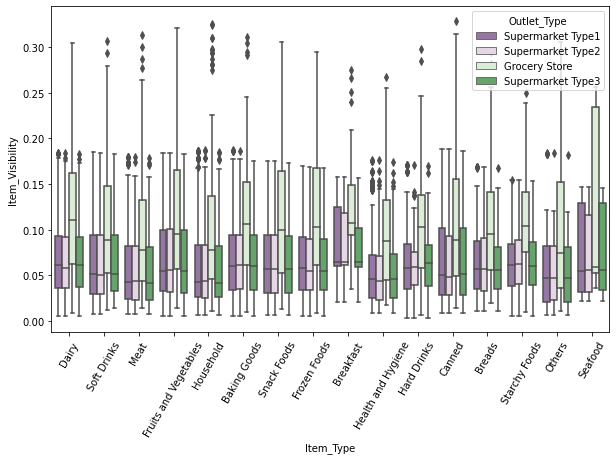

In [55]:
#Checking visibility in Item type with Outlet type
pyplt.figure(figsize=(10,6))
snsb.boxplot(data=df_combinedata, x='Item_Type', y='Item_Visibility', hue='Outlet_Type', palette = 'PRGn')
pyplt.xticks(rotation=60)

No missing values for missing visibility hence this can be used to fill nan values in visibility column

In [56]:
#Creating pivot table to help fill nan values of visibility from here
outlet_table = df_combinedata.pivot_table(values='Item_Visibility', index='Item_Type', columns='Outlet_Type', aggfunc='mean')
outlet_table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,0.116306,0.066692,0.068206,0.066524
Breads,0.111612,0.067579,0.067976,0.066038
Breakfast,0.126056,0.079993,0.083079,0.078609
Canned,0.112484,0.066167,0.064655,0.067549
Dairy,0.120742,0.069299,0.069000,0.069213
Frozen Foods,0.115895,0.065449,0.064184,0.064816
Fruits and Vegetables,0.114820,0.067123,0.067503,0.066758
Hard Drinks,0.109913,0.064873,0.063611,0.065297
Health and Hygiene,0.098924,0.055021,0.053081,0.054924


In [57]:
# replace the nan values
# define function that returns the mean values
def find_mean(z):
    return outlet_table.loc[z['Item_Type'], z['Outlet_Type']]

# replace missing values in visibility with mean values from above pivot table
df_combinedata['Item_Visibility'].fillna(df_combinedata[df_combinedata['Item_Visibility'].isnull()].apply(find_mean, axis=1), inplace=True)

###### Item_Weight

In [58]:
#we try to fill the nan values of wieht by using values from item identifier
item_weight_table = df_combinedata.pivot_table(values='Item_Weight', index='Item_Identifier')
item_weight_table

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [59]:
def find_wt(s):
    return item_weight_table.loc[s['Item_Identifier'],'Item_Weight']

df_combinedata['Item_Weight'].fillna(df_combinedata[df_combinedata['Item_Weight'].isnull()].apply(find_wt, axis=1), inplace=True)


###### Outlet_Size

In [60]:
df_combinedata['Outlet_Size'].replace(npy.NaN,'Unknown',inplace=True)

In [61]:
from scipy.stats import mode

In [62]:
Outlet__table = df_combinedata.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x:mode(x).mode[0]))
Outlet__table

,Outlet_Size
Outlet_Type,
Grocery Store,Unknown
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


Grocery stores are usually smaller than super markets so we will replace NaN values by small

In [63]:
#Filling nan values with mode
df_combinedata['Outlet_Size'].replace('Unknown','Small',inplace=True)

<AxesSubplot:>

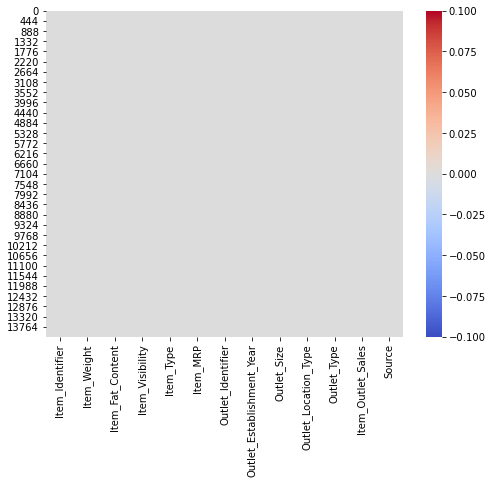

In [64]:
pyplt.figure(figsize=(8,6))
snsb.heatmap(df_combinedata.isnull(),cmap='coolwarm')

As we can that no null values ae remain in the dataframe

##### Engineering

###### Item_Identifier

In [65]:
df_combinedata['Item_Identifier']=df_combinedata['Item_Identifier'].apply(lambda x: x[:-2])

In [66]:
df_combinedata['Item_Identifier'].unique()

array(['FDA', 'DRC', 'FDN', 'FDX', 'NCD', 'FDP', 'FDO', 'FDH', 'FDU',
       'FDY', 'FDS', 'FDF', 'NCB', 'DRI', 'FDW', 'FDC', 'FDR', 'FDV',
       'DRJ', 'FDE', 'NCS', 'DRH', 'NCX', 'DRZ', 'FDB', 'FDK', 'FDL',
       'FDM', 'NCP', 'NCL', 'DRK', 'FDI', 'FDZ', 'NCI', 'FDJ', 'FDG',
       'NCZ', 'FDQ', 'FDD', 'DRG', 'NCR', 'FDT', 'DRB', 'DRE', 'DRA',
       'NCF', 'NCH', 'NCO', 'NCN', 'NCC', 'DRD', 'DRF', 'DRL', 'NCM',
       'NCU', 'DRY', 'NCW', 'DRM', 'NCT', 'NCQ', 'DRP', 'DRQ', 'NCK',
       'NCY', 'DRN', 'NCA', 'NCE', 'NCJ', 'NCV', 'NCG', 'DRO'],
      dtype=object)

Item_Identifier column looks more meaningful.

###### Correcting year column by eleminating  it from 2021

In [67]:
df_combinedata['Outlet_Establishment_Year']=(2021.0-df_combinedata['Outlet_Establishment_Year'])
df_combinedata.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,22.0,Medium,Tier 1,Supermarket Type1,3735.1380,df_train
1,DRC,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,12.0,Medium,Tier 3,Supermarket Type2,443.4228,df_train
2,FDN,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,22.0,Medium,Tier 1,Supermarket Type1,2097.2700,df_train
3,FDX,19.200,Regular,0.114820,Fruits and Vegetables,182.0950,OUT010,23.0,Small,Tier 3,Grocery Store,732.3800,df_train
4,NCD,8.930,Low Fat,0.057774,Household,53.8614,OUT013,34.0,High,Tier 3,Supermarket Type1,994.7052,df_train
5,FDP,10.395,Regular,0.068206,Baking Goods,51.4008,OUT018,12.0,Medium,Tier 3,Supermarket Type2,556.6088,df_train
6,FDO,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,34.0,High,Tier 3,Supermarket Type1,343.5528,df_train
7,FDP,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,36.0,Medium,Tier 3,Supermarket Type3,4022.7636,df_train
8,FDH,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,19.0,Small,Tier 2,Supermarket Type1,1076.5986,df_train
9,FDU,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,14.0,Small,Tier 2,Supermarket Type1,4710.5350,df_train


###### Merging all the low fat categories to Low fat and regular categories to Regular

In [68]:
df_combinedata['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [69]:
df_combinedata['Item_Fat_Content'].replace('reg','Regular',inplace=True)
df_combinedata['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat',inplace=True)
df_combinedata['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

Now we have only two categories in the fat content column

##### Encoding Features

In [70]:
#Using Ordinal Encoder for encoding object type values
from sklearn.preprocessing import OrdinalEncoder
Oe=OrdinalEncoder()

In [71]:
objt=[feature for feature in df_combinedata.columns if df_combinedata[feature].dtypes=='O' and feature!='Source']
objt

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [72]:
for i in objt:
    df_combinedata[i]=Oe.fit_transform(df_combinedata[i].values.reshape(-1,1))

In [73]:
df_combinedata.dtypes

Item_Identifier              float64
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year    float64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
Item_Outlet_Sales            float64
Source                        object
dtype: object

All columns are converted into float type.

## Removing the Outliers and Skewness

##### Removing outliers from Visibiltiy column

In [74]:
df_combinedata=df_combinedata[npy.abs(df_combinedata.Item_Visibility-df_combinedata.Item_Visibility.mean())<=(3*df_combinedata.Item_Visibility.std())]

In [75]:
df_combinedata.shape

(14023, 13)

<AxesSubplot:xlabel='Item_Visibility'>

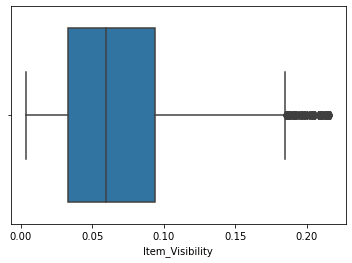

In [76]:
snsb.boxplot(df_combinedata['Item_Visibility'])

##### Removing skewness from visibility column

In [77]:
df_combinedata['Item_Visibility'].skew()

0.8492005168606449

In [78]:
df_combinedata['Item_Visibility']=npy.sqrt(df_combinedata['Item_Visibility'])

In [79]:
df_combinedata['Item_Visibility'].skew()

0.21330304743134373

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

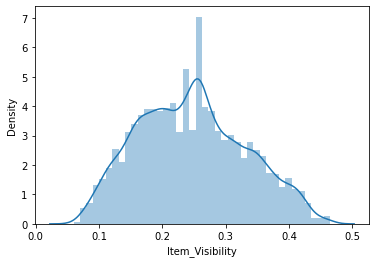

In [80]:
snsb.distplot(df_combinedata['Item_Visibility'])

Outliers and skewness both are removed from the visibility column

##### Scaling the data

In [81]:
from sklearn.preprocessing import MinMaxScaler
MinMax =MinMaxScaler()

In [82]:
df_combinedata.iloc[:,:-2]=MinMax.fit_transform(df_combinedata.iloc[:,:-2])

##### Separating the data into train and test

In [83]:
data_train = df_combinedata.loc[df_combinedata['Source']=='df_train']
data_test = df_combinedata.loc[df_combinedata['Source']=='df_test']

In [84]:
data_train.drop('Source',axis=1,inplace=True)
data_test.drop(['Source','Item_Outlet_Sales'],axis=1,inplace=True)

In [85]:
data_train=data_train.reset_index(drop=True)
data_test=data_test.reset_index(drop=True)

In [86]:
data_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.271429,0.282525,0.0,0.164962,0.266667,0.927507,1.000000,0.416667,0.5,0.0,0.333333,3735.1380
1,0.028571,0.081274,1.0,0.194970,0.933333,0.072068,0.333333,0.000000,0.5,1.0,0.666667,443.4228
2,0.457143,0.770765,0.0,0.171824,0.666667,0.468288,1.000000,0.416667,0.5,0.0,0.333333,2097.2700
3,0.600000,0.871986,1.0,0.688223,0.400000,0.640093,0.000000,0.458333,1.0,1.0,0.000000,732.3800
4,0.685714,0.260494,0.0,0.445327,0.600000,0.095805,0.111111,0.916667,0.0,1.0,0.333333,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,0.342857,0.137541,0.0,0.440225,0.866667,0.777729,0.111111,0.916667,0.0,1.0,0.333333,2778.3834
8421,0.528571,0.227746,1.0,0.387107,0.000000,0.326263,0.777778,0.291667,1.0,0.5,0.333333,549.2850
8422,0.771429,0.359929,0.0,0.315158,0.533333,0.228492,0.666667,0.208333,1.0,0.5,0.333333,1193.1136
8423,0.457143,0.158083,1.0,0.792362,0.866667,0.304939,0.333333,0.000000,0.5,1.0,0.666667,1845.5976


In [87]:
data_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.585714,0.964275,0.0,0.067049,0.866667,0.325012,1.000000,0.416667,0.5,0.0,0.333333
1,0.585714,0.222983,1.0,0.335997,0.266667,0.237819,0.222222,0.083333,1.0,0.5,0.333333
2,0.828571,0.598095,0.0,0.630769,0.733333,0.893316,0.000000,0.458333,1.0,1.0,0.000000
3,0.500000,0.164335,0.0,0.158480,0.866667,0.525233,0.222222,0.083333,1.0,0.5,0.333333
4,0.614286,0.538553,1.0,0.701863,0.266667,0.861381,0.555556,1.000000,0.5,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
5593,0.285714,0.353974,1.0,0.139058,0.866667,0.467004,0.888889,0.500000,1.0,0.0,0.333333
5594,0.314286,0.181304,1.0,0.785119,1.000000,0.585126,0.333333,0.000000,0.5,1.0,0.666667
5595,0.842857,0.324204,0.0,0.521286,0.533333,0.371199,0.777778,0.291667,1.0,0.5,0.333333
5596,0.400000,0.639774,1.0,0.486929,0.200000,0.778154,0.222222,0.083333,1.0,0.5,0.333333


# Modelling Phase

Importing neccessary modules and libraries for modelling.

In [88]:
from sklearn.model_selection import train_test_split,cross_val_score
#importing models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [89]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [90]:
x=data_train.iloc[:,:-1]
y=data_train.iloc[:,-1]

In [91]:
#Choosing the best random state using Logistic regression
def randomstate(a,b):
    maxx=0
    for state in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.1,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        r2=r2_score(p,ytest)
        if maxx<r2:
            maxx=r2
            j=state
    return j

In [92]:
#Creating list of models and another list mapped to their names
models=[KNeighborsRegressor(),LinearRegression(),Lasso(),Ridge(),ElasticNet(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]

names=['KNeighborsRegressor','LinearRegression','Lasso','Ridge','ElasticNet','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','XGBRegressor']

In [93]:
def performance(p,ytest,s,n):
    print(MinMax)
    print('Mean Absolute Error is',nps.round(mean_absolute_error(p,ytest),4))
    print('Mean Squared Error is',nps.round(mean_squared_error(p,ytest),4))
    print('Root Mean Squared Error is',nps.round(nps.sqrt(mean_squared_error(p,ytest)),4))
    print('R2 Score is',nps.round(r2_score(p,ytest),4)*100)
    print('Mean of cross validaton Score is',nps.round(nps.mean(s),4))
    print('--------------------------------------------------------------------------')

In [94]:
def createmodels(model_list,independent,dependent,n):
    xtrain,xtest,ytrain,ytest=train_test_split(independent,dependent,test_size=0.1,random_state=randomstate(x,y))
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,independent,dependent,cv=10)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(npy.round(mean_absolute_error(p,ytest),4))
        meansqd.append(npy.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(npy.round(npy.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(npy.round(r2_score(p,ytest),4)*100)
        mcv.append(npy.round(npy.mean(score),4)*100)
    
    #Creating Dataframe
    data=pds.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross validaton Score']=mcv
    data.set_index('Model',inplace = True)
    return data
        

In [95]:
createmodels(models,x,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,783.9771,1.220089e+06,1104.5763,30.62,50.28
LinearRegression,847.0767,1.281684e+06,1132.1147,18.26,49.79
Lasso,846.6451,1.280971e+06,1131.7997,17.41,49.82
Ridge,846.9693,1.281651e+06,1132.1005,17.95,49.79
ElasticNet,1241.0890,2.413191e+06,1553.4447,-7376.18,12.60
DecisionTreeRegressor,1010.8803,2.034759e+06,1426.4500,28.40,16.01
RandomForestRegressor,758.8650,1.169761e+06,1081.5547,37.64,54.84
AdaBoostRegressor,926.8500,1.396327e+06,1181.6626,0.01,42.09
GradientBoostingRegressor,707.3207,1.030375e+06,1015.0740,40.53,58.74


From above analysis only Random Forest, Gradient Boost and xgboost perform well with r2 scor more than 51 and mean absolute error less than 810.Though the results are not as good therefore we further try to increase the scores by Feature Selection

# Feature selection

##### Using ANOVA test

In [141]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [142]:
selectionkbest = SelectKBest(score_func=f_classif)
fitmdl = selectionkbest.fit(x,y)

In [143]:
dfscores_ = pds.DataFrame(fitmdl.scores_)
dfcolumns_ = pds.DataFrame(x.columns)
featureScores_ = pds.concat([dfcolumns_,dfscores_],axis=1)
featureScores_.columns = ['Features','Score']  #naming the dataframe columns
featureScores_

,Features,Score
0,Item_Identifier,1.129296
1,Item_Weight,1.135301
2,Item_Fat_Content,1.164510
3,Item_Visibility,1.167628
4,Item_Type,1.195552
5,Item_MRP,3.497038
6,Outlet_Identifier,1.190374
7,Outlet_Establishment_Year,1.213252
8,Outlet_Size,1.059711
9,Outlet_Location_Type,1.037075


In [144]:
featureScores_.sort_values(by=['Score'],ascending=False)

,Features,Score
5,Item_MRP,3.497038
10,Outlet_Type,2.105619
7,Outlet_Establishment_Year,1.213252
4,Item_Type,1.195552
6,Outlet_Identifier,1.190374
3,Item_Visibility,1.167628
2,Item_Fat_Content,1.164510
1,Item_Weight,1.135301
0,Item_Identifier,1.129296
8,Outlet_Size,1.059711


The best features with there score in order after going through anova test

##### Using Feature Importances of Extra Trees Regressor

In [145]:
from sklearn.ensemble import ExtraTreesRegressor
modelET = ExtraTreesRegressor()
modelET.fit(x,y)

ExtraTreesRegressor()

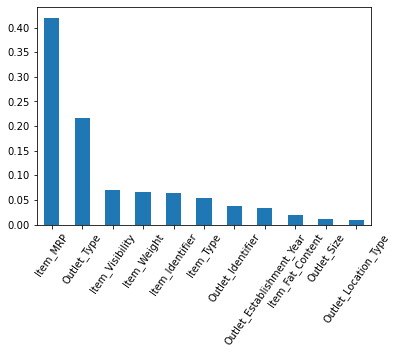

In [146]:
#plot graph of feature importances for better visualization
feat_imp = pds.Series(modelET.feature_importances_, index=x.columns)
feat_imp.nlargest(11).plot(kind='bar')
pyplt.xticks(rotation = 55)
pyplt.show()

MRP, Outlet weight are the most important features.

In [147]:
fi=list(feat_imp.nlargest(11).index)
fi

['Item_MRP',
 'Outlet_Type',
 'Item_Visibility',
 'Item_Weight',
 'Item_Identifier',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Item_Fat_Content',
 'Outlet_Size',
 'Outlet_Location_Type']

Above fi list contains features in order with most important feature on the top and least important feature below.

##### Using Lasso Coeficients

In [148]:
from sklearn.model_selection import GridSearchCV

In [149]:
param_gridCV={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
gscv=GridSearchCV(Lasso(),param_gridCV,scoring='neg_mean_squared_error',cv=10)
gscv.fit(x,y)
print(gscv.best_params_)

{'alpha': 1}


In [150]:
gscv=Lasso(alpha=1)
gscv.fit(x,y)


Lasso(alpha=1)

In [151]:
importance = npy.abs(gscv.coef_)

In [152]:
dfcolumns_ = pds.DataFrame(x.columns)
df_imp=pds.DataFrame(importance)
featureScores_ = pds.concat([dfcolumns_,df_imp],axis=1)
featureScores_.columns = ['Features','Coefficients']  #naming the dataframe columns
featureScores_

,Features,Coefficients
0,Item_Identifier,1.390688
1,Item_Weight,0.398274
2,Item_Fat_Content,54.623804
3,Item_Visibility,260.407711
4,Item_Type,0.000000
5,Item_MRP,3689.411377
6,Outlet_Identifier,482.277225
7,Outlet_Establishment_Year,7.023098
8,Outlet_Size,248.076053
9,Outlet_Location_Type,231.696856


In [153]:
featureScores_.sort_values(by=['Coefficients'],ascending=False)

,Features,Coefficients
5,Item_MRP,3689.411377
10,Outlet_Type,2483.451777
6,Outlet_Identifier,482.277225
3,Item_Visibility,260.407711
8,Outlet_Size,248.076053
9,Outlet_Location_Type,231.696856
2,Item_Fat_Content,54.623804
7,Outlet_Establishment_Year,7.023098
0,Item_Identifier,1.390688
1,Item_Weight,0.398274


Item_Type has coefficient 0 signify that is it has  less important feature according to Lasso coefficient

### Conclusion

Anova test and feature importances tell us that Outlet_Location_Type is the least significant feature.

Feature sekection tells us that Item_Type is the least significant feature

In [154]:
t1=x.drop('Outlet_Location_Type',axis=1)
t2=x.drop('Item_Type',axis=1)
t3=x.drop(['Outlet_Location_Type','Item_Type'],axis=1)

In [125]:
#Testing x1 dataset
createmodels(models,t1,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,781.6761,1.203224e+06,1096.9156,31.61,50.36
LinearRegression,847.8549,1.283954e+06,1133.1168,17.94,49.72
Lasso,847.4356,1.283203e+06,1132.7854,17.12,49.75
Ridge,847.7195,1.283915e+06,1133.0999,17.65,49.72
ElasticNet,1242.4390,2.417906e+06,1554.9618,-7909.16,12.42
DecisionTreeRegressor,996.3464,2.027560e+06,1423.9241,26.36,16.36
RandomForestRegressor,761.1304,1.162414e+06,1078.1533,38.87,54.60
AdaBoostRegressor,926.1967,1.388557e+06,1178.3705,2.81,42.00
GradientBoostingRegressor,707.5459,1.029239e+06,1014.5143,40.65,58.69


In [155]:
#Testing x2 dataset
createmodels(models,t2,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,777.3862,1.200259e+06,1095.5633,36.02,50.65
LinearRegression,846.9353,1.281495e+06,1132.0315,18.25,49.80
Lasso,846.6370,1.280959e+06,1131.7946,17.41,49.82
Ridge,846.8302,1.281467e+06,1132.0190,17.95,49.80
ElasticNet,1241.2261,2.413319e+06,1553.4860,-7374.88,12.60
DecisionTreeRegressor,1021.4343,2.172294e+06,1473.8704,24.94,16.07
RandomForestRegressor,757.0836,1.145999e+06,1070.5135,39.26,54.57
AdaBoostRegressor,946.4011,1.437211e+06,1198.8373,-6.34,42.13
GradientBoostingRegressor,706.3675,1.035036e+06,1017.3674,39.98,58.78


In [127]:
#Testing x3 dataset
createmodels(models,t3,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,774.5191,1.181558e+06,1086.9948,37.37,50.76
LinearRegression,847.7112,1.283777e+06,1133.0389,17.94,49.74
Lasso,847.4235,1.283190e+06,1132.7798,17.12,49.76
Ridge,847.5825,1.283742e+06,1133.0234,17.65,49.74
ElasticNet,1242.5725,2.418043e+06,1555.0056,-7905.46,12.42
DecisionTreeRegressor,1020.4558,2.137486e+06,1462.0144,24.87,14.16
RandomForestRegressor,754.4369,1.155651e+06,1075.0122,38.69,54.74
AdaBoostRegressor,984.0808,1.506551e+06,1227.4164,-11.24,45.51
GradientBoostingRegressor,705.5322,1.031194e+06,1015.4771,40.09,58.68


From above analysis we see that previous models which were performimng well are the one performing well even this time and the dataset providing least Root errors and highest mean cross validation score is Dataset x2 which we get after removing Item_Type which we got using feature selection of Lasso, even though results do not vary much even after doing feature selection so we will keep the original dataset for training purposes without loosing any data.

# Hyperparameter Tuning

We will use the hyper parameter tuning for only Xtreme Gradient Boost since the R2 Score and Mean Cross Validation Score is high enough to predict the data 


In [194]:
from sklearn.model_selection import GridSearchCV

In [195]:
params={
 "learning_rate"    : [0.001,0.05, 0.10, ] ,
 "max_depth"        : [ 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [196]:
xgboost=RandomizedSearchCV(XGBRegressor(),params,cv=5)

In [197]:
xgboost.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_

In [198]:
print(xgboost.best_estimator_)
print(xgboost.best_params_)
print(xgboost.best_score_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=8,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
{'min_child_weight': 5, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.5}
0.5588856937956134


In [199]:
xgbr=XGBRegressor(colsample_bytree= 0.7, gamma= 0.1, learning_rate=0.05, max_depth=5, min_child_weight= 3)
xgbr.fit(xtrain,ytrain)
p=xgbr.predict(xtest)

In [200]:
score=cross_val_score(xgbr,x,y,cv=10)

In [201]:
print('Mean Absolute Error-->',npy.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error-->',npy.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error-->',npy.round(npy.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score-->',npy.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score-->',npy.round(npy.mean(score)*100,4))

Mean Absolute Error--> 752.0525
Mean Squared Error--> 1138989.0358
Root Mean Squared Error--> 1067.2343
R2 Score--> 28.939999999999998
Mean of cross validaton Score--> 58.7006


## Conclusion

The best model with least error and highest R2 score and Cross_Validation_Score after hyperparameter tuning is Gradient Boost Regressor

## Finalizing the best model

In [202]:
model=GradientBoostingRegressor(learning_rate=0.05, subsample=1,max_depth= 3,n_estimators=100 )
model.fit(xtrain,ytrain)
p=model.predict(xtest)
score=cross_val_score(xgboost,x,y,cv=10)

## Evaluation Metrics

In [203]:
print('Mean Absolute Error-->',npy.round(mean_absolute_error(p,ytest),5))
print('Mean Squared Error-->',npy.round(mean_squared_error(p,ytest),5))
print('Root Mean Squared Error-->',npy.round(npy.sqrt(mean_squared_error(p,ytest)),5))
print('R2 Score-->',npy.round(r2_score(p,ytest),5)*100)
print('Mean of cross validaton Score-->',npy.round(npy.mean(score)*100,5))

Mean Absolute Error--> 749.01414
Mean Squared Error--> 1126738.48248
Root Mean Squared Error--> 1061.47938
R2 Score--> 32.39
Mean of cross validaton Score--> 57.93274


Text(0.5, 1.0, 'Gradient Boost Regressor(Classifier)')

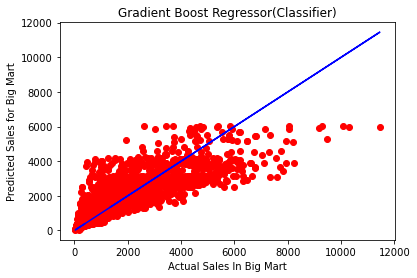

In [204]:
pyplt.scatter(x=ytest,y=p,color='r')
pyplt.plot(ytest,ytest,color='b')
pyplt.xlabel('Actual Sales In Big Mart')
pyplt.ylabel('Predicted Sales for Big Mart')
pyplt.title('Gradient Boost Regressor(Classifier)')

Still a lot of outliers in our output

## Saving the model

In [ ]:
import joblib
joblib.dump(model,'BigMartSales.pkl')

## Predicting the test dataset

In [205]:
predtion=model.predict(data_test)

In [206]:
predtion

array([1659.30985488, 1447.06275829,  582.29049267, ..., 1908.17028205,
       3542.04127492, 1299.3631608 ])

#### Saving the predictions

In [207]:
predtion=pds.DataFrame(predtion)

In [208]:
predtion.to_csv('prediction_test_data_csv.csv')